In [1]:
#######################################################
#   Setup standard analysis environment              ##
#      (see gitlab.com/glass-ships/analysis-tools)   ##
#######################################################

import os, sys

import pandas
import numpy as np
#np.set_printoptions(threshold=np.inf)

from math import *
import scipy
import scipy.integrate as spi
from scipy import stats

# Plotting modules
import matplotlib.pyplot as plt
from matplotlib import style
#import matplotlib.image as mpimg
%matplotlib inline
style.use('seaborn-whitegrid')

# LaTeX rendering in plots 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

-----
#### Exercise 1.1 - Matrix algebra (1.2 in the Python book)

In [2]:
A = [[1,2],[3,4]]
B = np.array(A)

print('A+A=\n',A+A) # Appends the list to itself; now a 4x2 matrix
print('B+B=\n',B+B) 
print('A+B=\n',A+B)
# print('A-A=\n',A-A) # returns TypeError: unsupported operand type(s) for -: 'list' and 'list'
print('B-B=\n',B-B)
print('2*A=\n',2*A)
print('2*B=\n',2*B)
# print('A*A=\n',A*A) # returns TypeError: can't multiply sequence by non-int of type 'list'
print('B*B=\n',B*B) 
print('np.dot(B,B)=\n',np.dot(B,B))
print('B**2=\n',B**2)
print('B/B=\n',B/B)

A+A=
 [[1, 2], [3, 4], [1, 2], [3, 4]]
B+B=
 [[2 4]
 [6 8]]
A+B=
 [[2 4]
 [6 8]]
B-B=
 [[0 0]
 [0 0]]
2*A=
 [[1, 2], [3, 4], [1, 2], [3, 4]]
2*B=
 [[2 4]
 [6 8]]
B*B=
 [[ 1  4]
 [ 9 16]]
np.dot(B,B)=
 [[ 7 10]
 [15 22]]
B**2=
 [[ 1  4]
 [ 9 16]]
B/B=
 [[1. 1.]
 [1. 1.]]


-----
#### Exercise 1.2 - Data plotting (1.3 in python)

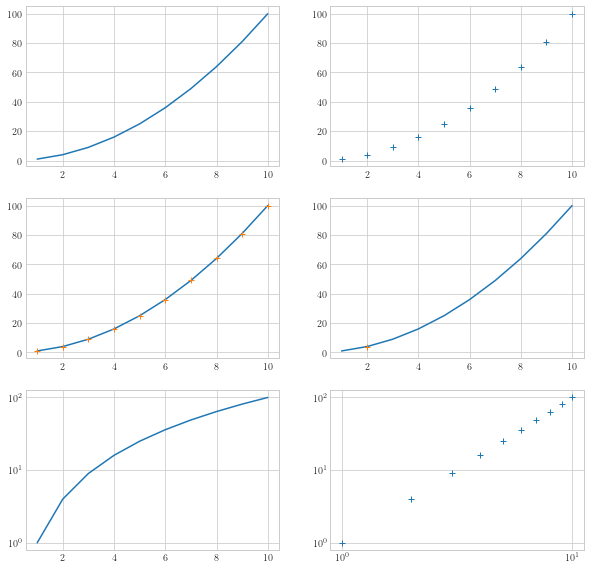

In [3]:
### Setup some arrays

x = np.array([1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
y = x**2

### Subplots to demonstrate some pyplot functionality

plt.figure(figsize = (10,10))

plt.subplot(321)
plt.plot(x,y)

plt.subplot(322)
plt.plot(x,y,'+')

plt.subplot(323)
plt.plot(x,y,'-',x,y,'+')

plt.subplot(324)
plt.plot(x,y,'-',x[1:2:10],y[1:2:10],'+')

plt.subplot(325)
plt.semilogy(x,y)

plt.subplot(326)
plt.loglog(x,y,'+')
plt.show;

-----
#### Exercise 1.3 - Function plotting (1.4 p)

In [4]:
### Define functions described in Figure 1.1

def f1(j):
    return exp(-j/4)*sin(j)

def f2(j):
    return exp(-j)*sin(j)

def f3(j): return sin(j*6)

### Fill some lists with values to plot

x= np.arange(0,20,0.01)

y1 = [f1(i) for i in x]

y2 = [f2(i) for i in x]

y3 = [f3(i) for i in x]

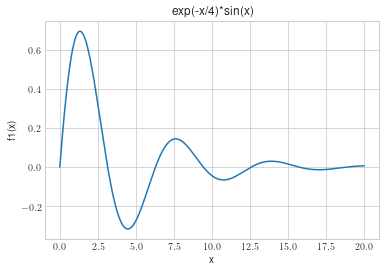

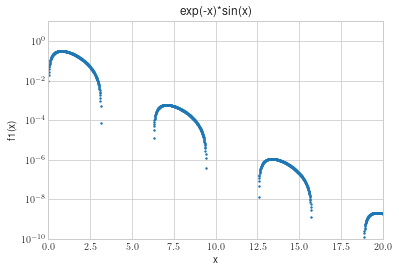

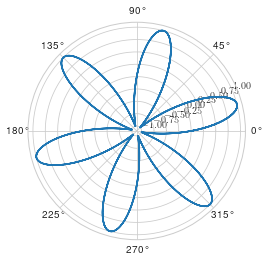

In [5]:
# Alternate method for displaying 
# multiple plots in a jupyter notebook

### Create a new subplot for each function
# Allows different axes and coordinate systems 

fig1, ax1 = plt.subplots()
ax1.plot(x,y1)
ax1.set_title('exp(-x/4)*sin(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('f1(x)')

fig2, ax2 = plt.subplots()
ax2.semilogy()
ax2.scatter(x,y2,s=2)
ax2.set_title('exp(-x)*sin(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('f1(x)')
ax2.set_xlim(0,20)
ax2.set_ylim(10**-10,10)

fig3, ax3 = plt.subplots(subplot_kw=dict(polar=True))
ax3.plot(x,y3)

plt.show();

-----
#### Exercise 1.9 - Hello, world (1.1 p)

In [6]:
### A deliberately contrived hello world example to demonstrate some Python features

def compose(i):
    return i

letters = ['h', 'e', 'l','l','o',' ','w','o','r','l','d','!']

word = ''.join(compose(letters))
print('%s' %(word))

hello world!


-----
#### Exercise 1.10 - Machine benchmarking (1.7 p)

In [7]:
# Note: most of these values are based on sys.float_info, 
# and are determined by the C standard header "float.h"

print('a. Max float: \n',sys.float_info.max,'\n')

print('b. Max int: \n',sys.maxsize,'\n')
print('   (1 + ',sys.maxsize,') - 1 = ',(sys.maxsize + 1) - 1,'\n')

print('c. Min float: \n',np.nextafter(0,0.1),'\n')
print('   (1 + ',np.nextafter(0,0.1),') - 1 = ',(np.nextafter(0,0.1) + 1) - 1,'\n')

def j(x): return (1+x)-1
i_guess = 10**-250
j_guess = j(i_guess)

i_closer = ((1e-15)/9)
j = j(i_closer)

print('d. Min float (non-zero) approximated by manual iterations: \n',
      i_closer,
      '\n\n   (min_float+1)-1: ',j,'\n')

print('e. Max array size (memory restricted): \n',
      int(sqrt(sys.maxsize)),'x',int(sqrt(sys.maxsize)),
      '\n (square root max int size, rounded to int. square maximizes area.)\n')

print('f. Longest row vector: same as max int, ',sys.maxsize,'elements\n')

# Loop to find largest compatible dimention for matricies
# (start with 2 because log(1)=0)
l = 2; a = sys.maxsize
i = 0 
while i == 0:
    d1 = np.log(a)/np.log(l)
    d2 = np.log(a)/np.log(l+1)
    if d2 > d1:
        l+=2
    elif d2 <= d1:
        print('g. Largest dimensionality for matrix: ',d1)
        i = 1

a. Max float: 
 1.7976931348623157e+308 

b. Max int: 
 9223372036854775807 

   (1 +  9223372036854775807 ) - 1 =  9223372036854775807 

c. Min float: 
 5e-324 

   (1 +  5e-324 ) - 1 =  0.0 

d. Min float (non-zero) approximated by manual iterations: 
 1.1111111111111112e-16 

   (min_float+1)-1:  2.220446049250313e-16 

e. Max array size (memory restricted): 
 3037000499 x 3037000499 
 (square root max int size, rounded to int. square maximizes area.)

f. Longest row vector: same as max int,  9223372036854775807 elements

g. Largest dimensionality for matrix:  63.0


-----
#### Exercise 1.11 - Timing (1.8 p)

In [8]:
### A simple method to print out the CPU time to process

import time
import random 

timer1 = time.perf_counter()

# Define a float range function
def frange(start, stop=None, step=None):
    # if stop and step argument is None set start=0.0 and step = 1.0
    start = float(start)
    if stop == None:
        stop = start + 0.0
        start = 0.0
    if step == None:
        step = 1.0

    #print("start= ", start, "stop= ", stop, "step= ", step)

    count = 0
    while True:
        temp = float(start + count * step)
        if step > 0 and temp >= stop:
            break
        elif step < 0 and temp <= stop:
            break
        yield temp
        count += 1
        
# Create a timed loop multiplying two random floats
end_times = time.time() + 60.0
i = 1
while time.time() < end_times:
    a = random.sample([i for i in frange(0,20.0, 10**-3)] ,k=2)
    b = a[0]*a[1]
    i += 1
print('Number of random float multiplications in 1 min: ', i);

Number of random float multiplications in 1 min:  12998


-----
#### Exercise 1.15 - Interpolating function (1.14 p)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


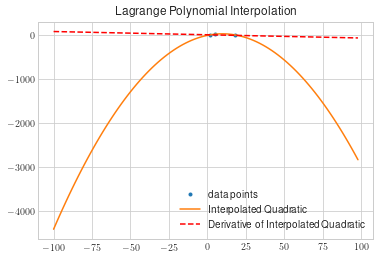

In [10]:
def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m

def interpf(xi,x,y):
    """Function to interpolate between data points using qudratic Lagrange polynomial 
    and return the derivative of the polynomial at a given point.
    Inputs
        x    Vector of x coordinates (3 values)
        y    Vector of y coordinates (3 values)
        xi   x value at which to compute interpolation
    Outputs
        yi   Interpolated y value at xi
        mi   Slope of interpolated polynomial evaluated at xi
    """
    
    #* Calculate yi = p(xi) using Lagrange polynomial *# 
    yi = ( (xi-x[1])*(xi-x[2])/((x[0]-x[1])*(x[0]-x[2])) * y[0]
         + (xi-x[0])*(xi-x[2])/((x[1]-x[0])*(x[1]-x[2])) * y[1] 
         + (xi-x[0])*(xi-x[1])/((x[2]-x[0])*(x[2]-x[1])) * y[2] )
    xj = xi + 1
    yj = ( (xj-x[1])*(xj-x[2])/((x[0]-x[1])*(x[0]-x[2])) * y[0]
         + (xj-x[0])*(xj-x[2])/((x[1]-x[0])*(x[1]-x[2])) * y[1] 
         + (xj-x[0])*(xj-x[1])/((x[2]-x[0])*(x[2]-x[1])) * y[2] )
    mi = slope(xi,yi,xj,yj)
    return mi, yi

x = y = np.empty(3) 
x = [2,5,18]
y = [6,20,4]

nplot = 100
xr = np.array([-nplot,nplot])

xi = np.empty(nplot)
yi = np.empty(nplot)
mi = np.empty(nplot)

for i in range(nplot):
    xi[i] = xr[0] + (xr[1]-xr[0])*i/float(nplot)
    mi[i], yi[i] = interpf(xi[i],x,y)

plt.plot(x,y,'.',label='data points')
plt.plot(xi,yi,'-',label='Interpolated Quadratic')
plt.plot(xi,mi,'r--',label='Derivative of Interpolated Quadratic')
plt.title('Lagrange Polynomial Interpolation')
plt.legend(loc='lower right')
plt.show();